# RCT Safaera:

- Autor: Juan Sebastián Cañas
- Fecha:  21/09/2020

El siguiente notebook reune el procesamiento y análisis del RCT definido en el [taller2](https://github.com/fbogliacino/Evaluacion-de-Impacto-/blob/master/Talleres/Taller%20II.pdf) de EVIMP2020. Los datos utilizados se encuentran en la misma carpeta del repositorio del taller2. 

In [1]:
import pandas as pd

import statsmodels.api as sm
from patsy import dmatrices

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
safaera_path = '/Users/jscs/Evaluacion-de-Impacto-/Talleres/Datos Taller II.xlsx'
safaera = pd.read_excel(safaera_path)
print('Dimensiones de la base de datos:',safaera.shape)
print('Columnas: ',safaera.columns)

Dimensiones de la base de datos: (200, 9)
Columnas:  Index(['hogar', 'escuela', 'tamano_hogar', 'rural', 'mujer_cabeza',
       'ingreso_hogar', 'treatment', 'outcome', 'nota_hijos'],
      dtype='object')


In [3]:
print('Valores vaciós: \n',safaera.isna().sum())

Valores vaciós: 
 hogar            0
escuela          0
tamano_hogar     0
rural            0
mujer_cabeza     0
ingreso_hogar    0
treatment        0
outcome          0
nota_hijos       0
dtype: int64


In [4]:
safaera.head()

,hogar,escuela,tamano_hogar,rural,mujer_cabeza,ingreso_hogar,treatment,outcome,nota_hijos
0,1,2,5,1,0,703.2788,1,8.149182,5.000000
1,2,5,8,1,1,729.6567,1,7.729016,5.000000
2,3,4,4,1,0,711.3281,1,4.947027,4.708693
3,4,3,7,1,1,469.8198,0,2.157394,3.660402
4,5,10,6,0,1,1042.2770,0,5.138645,2.726179


In [5]:
print('Escuelas:',safaera.escuela.unique())

Escuelas: [ 2  5  4  3 10  7  9  6  1  8]


In [6]:
print('Conteo de niños en escuelas:\n',safaera.escuela.value_counts())

Conteo de niños en escuelas:
 5     27
8     24
3     24
2     23
7     22
6     22
9     20
4     15
10    12
1     11
Name: escuela, dtype: int64


# Línea base:

Variable: tamano_hogar
6    40
8    38
7    36
5    32
4    28
9    26
Name: tamano_hogar, dtype: int64


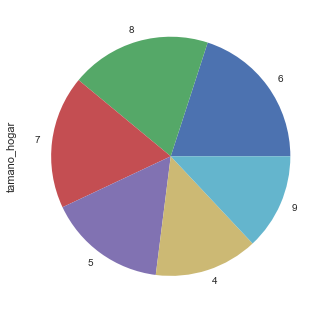

Variable: rural
1    103
0     97
Name: rural, dtype: int64


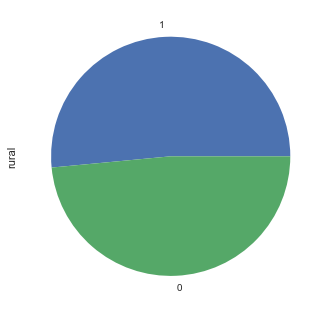

Variable: mujer_cabeza
1    104
0     96
Name: mujer_cabeza, dtype: int64


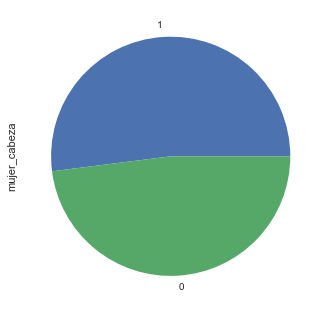

Variable: escuela
5     27
8     24
3     24
2     23
7     22
6     22
9     20
4     15
10    12
1     11
Name: escuela, dtype: int64


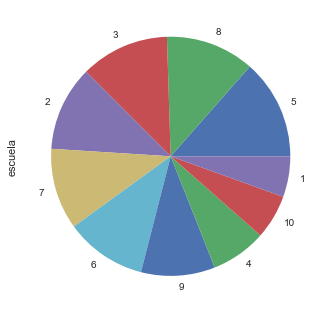

In [7]:
variables_encuesta_inicial = ['tamano_hogar','rural','mujer_cabeza','escuela']
for i in variables_encuesta_inicial:
    print('Variable:', i)
    print(safaera[i].value_counts())
    safaera[i].value_counts().plot(kind='pie')
    plt.show()

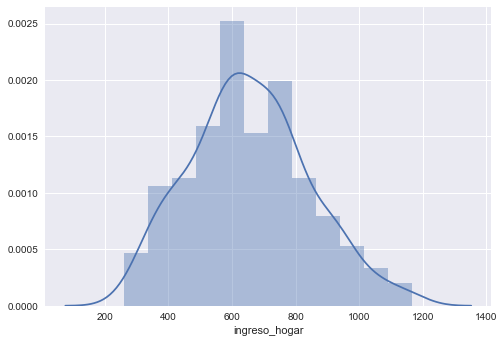

In [8]:
ax = sns.distplot(safaera['ingreso_hogar'])

# Lotería: 

Luego se asignaron los hogares a tratamiento o control, a través de una lotería.
El tratamiento implicaba una semana de toma de pildoras, con efectos colaterales leves

In [9]:
safaera_tratados = safaera[safaera['treatment'] == 1]
print('Tratados:',safaera_tratados.shape)
safaera_no_tratados = safaera[safaera['treatment'] == 0]
print('No tratados:',safaera_no_tratados.shape)

Tratados: (108, 9)
No tratados: (92, 9)


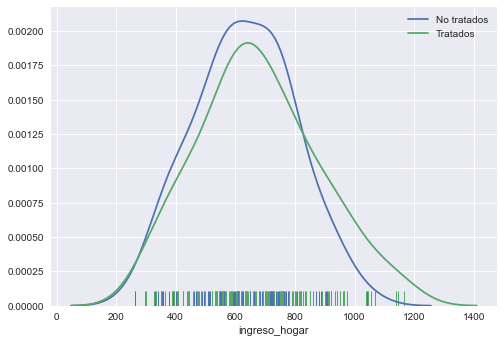

In [10]:
#title='Distribución de ingreso de los hogares de niños tratados y no tratados' .set_title(title)
sns.distplot(safaera_no_tratados['ingreso_hogar'], hist=False, rug=True,label='No tratados')
sns.distplot(safaera_tratados['ingreso_hogar'], hist=False, rug=True,label='Tratados')
plt.legend()
plt.savefig('ingreso.png',dpi=300)
plt.show()

In [11]:
safaera_tratados['ingreso_hogar'].describe()

count     108.000000
mean      677.045350
std       200.881580
min       296.280500
25%       542.904475
50%       651.475200
75%       806.880275
max      1166.186000
Name: ingreso_hogar, dtype: float64

In [12]:
safaera_no_tratados['ingreso_hogar'].describe()

count      92.000000
mean      631.099189
std       166.067056
min       262.109100
25%       519.246000
50%       621.505100
75%       747.979375
max      1042.277000
Name: ingreso_hogar, dtype: float64

In [13]:
safaera_tratados['tamano_hogar'].describe()

count    108.000000
mean       6.324074
std        1.645320
min        4.000000
25%        5.000000
50%        6.000000
75%        8.000000
max        9.000000
Name: tamano_hogar, dtype: float64

In [14]:
safaera_no_tratados['tamano_hogar'].describe()

count    92.000000
mean      6.728261
std       1.541394
min       4.000000
25%       6.000000
50%       7.000000
75%       8.000000
max       9.000000
Name: tamano_hogar, dtype: float64

In [15]:
safaera_no_tratados['rural'].describe()

count    92.000000
mean      0.489130
std       0.502621
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: rural, dtype: float64

In [16]:
safaera_tratados['rural'].value_counts(normalize=True)*100

1    53.703704
0    46.296296
Name: rural, dtype: float64

In [17]:
safaera_no_tratados['rural'].value_counts(normalize=True)*100

0    51.086957
1    48.913043
Name: rural, dtype: float64

In [18]:
safaera_tratados['mujer_cabeza'].value_counts(normalize=True)*100

0    51.851852
1    48.148148
Name: mujer_cabeza, dtype: float64

In [19]:
safaera_no_tratados['mujer_cabeza'].value_counts(normalize=True)*100

1    56.521739
0    43.478261
Name: mujer_cabeza, dtype: float64

# Impacto causal:
Impacto causal del tratamiento sobre el estado de salud con  el Índice entre 0 y 10, siendo 10 el estado de salud mejor.

In [20]:
E_Y1_given_D1 = safaera_tratados['outcome'].mean() 
E_Y0_given_D0 = safaera_no_tratados['outcome'].mean()
# Como confiamos en la aleatorización del RCT entonces 
selection_bias,heterogenous_treatment_effect_bias = 0, 0
SDO = E_Y1_given_D1 - E_Y0_given_D0 + selection_bias + heterogenous_treatment_effect_bias
# entonces, como el tratamiento es independiente de los outcomes potenciales
# es decir, en la población se tienen los mismos outcomes potenciales en promedio
ATE = SDO
print('Average treatment effect:',ATE)

Average treatment effect: 4.8737952905394515


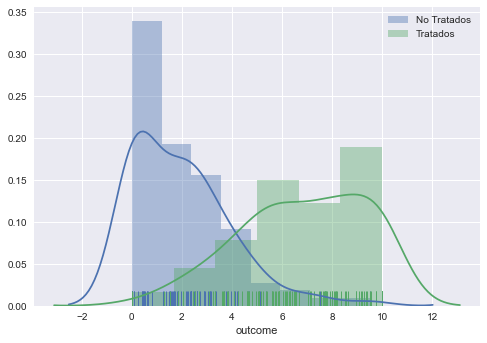

In [21]:
sns.distplot(safaera_no_tratados['outcome'], hist=True, rug=True, label='No Tratados')
sns.distplot(safaera_tratados['outcome'], hist=True, rug=True, label='Tratados')
plt.legend()
plt.savefig('outcome.png',dpi=300)
plt.show()

In [22]:
print(safaera_no_tratados['outcome'].describe())

count    92.000000
mean      1.951870
std       1.959404
min       0.000000
25%       0.063777
50%       1.689637
75%       2.947517
max       9.495711
Name: outcome, dtype: float64


In [23]:
print(safaera_tratados['outcome'].describe())

count    108.000000
mean       6.825665
std        2.491524
min        0.000000
25%        5.092615
50%        7.121342
75%        9.075097
max       10.000000
Name: outcome, dtype: float64


# Regresión: 

 $$IndiceSalud = \beta Tratamiento + MujerCabezaHogar +  Rural  $$

In [24]:
# mujer_cabeza, ingreso_hogar, rural, tamano_hogar
y, X = dmatrices('outcome ~ treatment  + mujer_cabeza + rural '  , 
                 data=safaera, return_type='dataframe')

res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     91.88
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           3.65e-37
Time:                        08:48:14   Log-Likelihood:                -435.48
No. Observations:                 200   AIC:                             879.0
Df Residuals:                     196   BIC:                             892.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9625      0.327      9.073   

In [25]:
ATE

4.8737952905394515

In [26]:
res.params

Intercept       2.962549
treatment       4.779547
mujer_cabeza   -1.389246
rural          -0.460927
dtype: float64

In [27]:
res.rsquared

0.5844270732560353

In [28]:
sm.stats.linear_rainbow(res)

(1.0050426051588157, 0.4906452106090746)

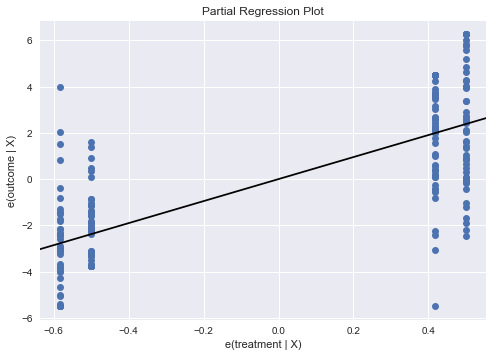

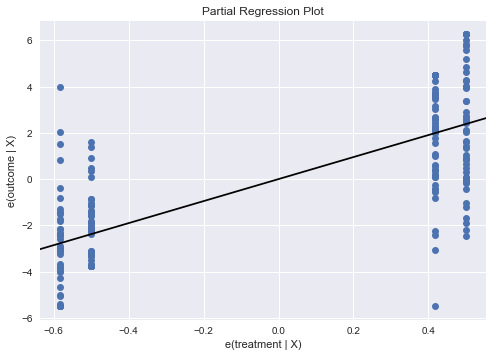

In [29]:
sm.graphics.plot_partregress('outcome', 'treatment',['mujer_cabeza',],
                            data=safaera, obs_labels=False)

# SUTVA:

In [30]:
pd.crosstab(safaera['escuela'],safaera['treatment']).T

escuela,1,2,3,4,5,6,7,8,9,10
treatment,,,,,,,,,,
0,7,8,9,10,0,22,0,24,0,12
1,4,15,15,5,27,0,22,0,20,0


In [31]:
escuelas_sutva = [5,6,7,8,9,10]
safaera_sutva = safaera[safaera['escuela'].isin(escuelas_sutva)]
print('Datos SUTVA:',safaera_sutva.shape)

Datos SUTVA: (127, 9)


In [32]:
safaera_sutva_tratados = safaera_sutva[safaera_sutva['treatment'] == 1]
print('Tratados SUTVA:',safaera_sutva_tratados.shape)
safaera_sutva_no_tratados = safaera_sutva[safaera_sutva['treatment'] == 0]
print('No tratados SUTVA:',safaera_sutva_no_tratados.shape)

Tratados SUTVA: (69, 9)
No tratados SUTVA: (58, 9)


In [33]:
ATE

4.8737952905394515

In [34]:
ATE_sutva =  safaera_sutva_tratados['outcome'].mean() - safaera_sutva_no_tratados['outcome'].mean()
ATE_sutva

4.870737070164916

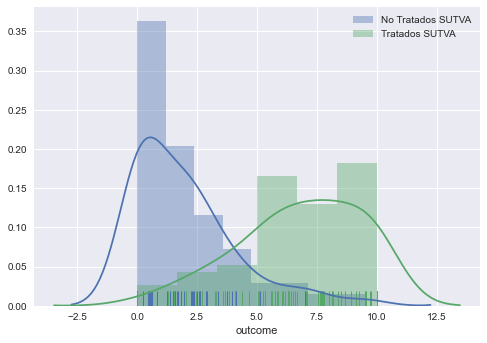

In [35]:
sns.distplot(safaera_sutva_no_tratados['outcome'], hist=True, rug=True,label='No Tratados SUTVA' ,)
sns.distplot(safaera_sutva_tratados['outcome'], hist=True, rug=True,label='Tratados SUTVA',)
plt.legend()
plt.show()

# Impacto en las notas

In [36]:
ATE_notas =  safaera_tratados['nota_hijos'].mean() - safaera_no_tratados['nota_hijos'].mean()
ATE_notas

0.8271940660225425

In [37]:
ATE_notas_sutva =  safaera_sutva_tratados['nota_hijos'].mean() - safaera_sutva_no_tratados['nota_hijos'].mean()
ATE_notas_sutva

0.7826446161919027

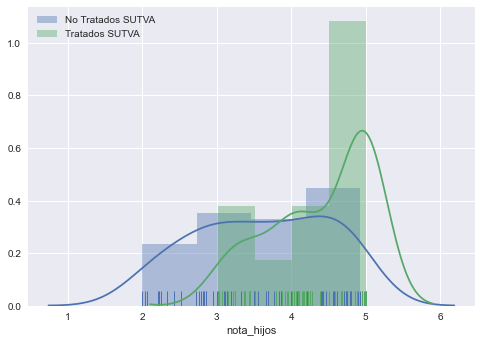

In [38]:
sns.distplot(safaera_sutva_no_tratados['nota_hijos'], hist=True, rug=True,label='No Tratados SUTVA' ,)
sns.distplot(safaera_sutva_tratados['nota_hijos'], hist=True, rug=True,label='Tratados SUTVA',)
plt.legend()
plt.savefig('notas.png',dpi=300)
plt.show()